In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import statistics
import rasterio

In [2]:
database1 = pd.read_csv("/Users/rishi/Documents/ORNL Internships/25/Database_p1.csv", encoding='latin1')
database2 = pd.read_csv("/Users/rishi/Documents/ORNL Internships/25/Database_p2.csv", encoding='latin1')
database3 = pd.read_csv("/Users/rishi/Documents/ORNL Internships/25/Database_p3.csv", encoding='latin1')
biomes = pd.read_csv("/Users/rishi/Documents/ORNL Internships/25/Biomes.csv")


database = pd.concat([database1,database2,database3],ignore_index=True)
database = pd.merge(database,biomes,on='Biome_number')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (1,29,30,39,42,43) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (1,29,30,33,35,43,44) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (29,43,44) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


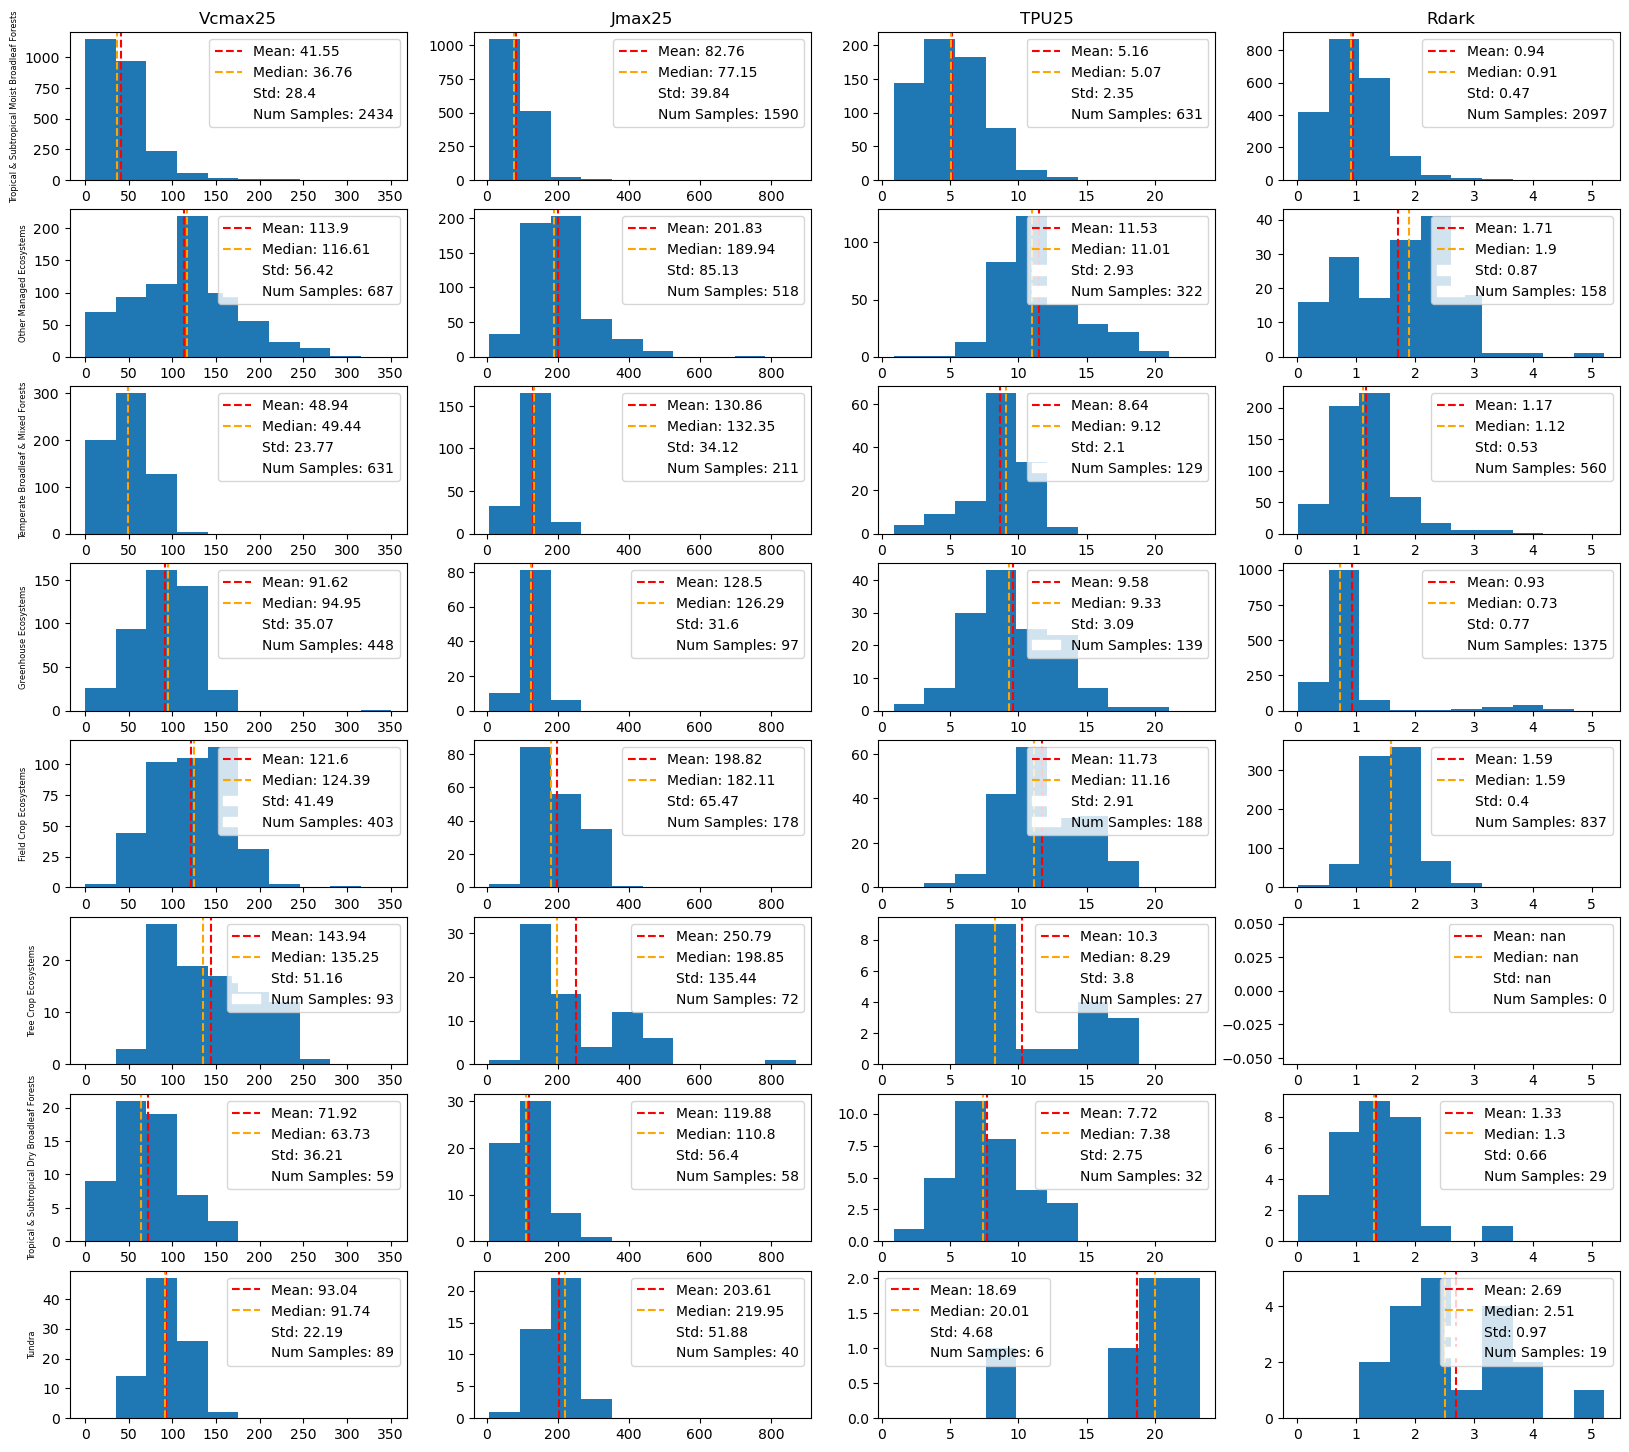

In [3]:
figs,ax = plt.subplots(8,4, figsize=(20,18))

params = ['Vcmax25','Jmax25','TPU25','Rdark']
biomes = database['Biome'].unique()

for i in range(len(biomes)):
    temp = database[database['Biome'] == biomes[i]]
    for j in range(len(params)):

        temp1 = temp.dropna(subset=[params[j]])
        ax[i,j].hist(temp1[params[j]], range=(np.nanmin(database[params[j]]), np.nanmax(database[params[j]])))

        mean = np.round(np.mean(temp1[params[j]]), decimals=2)
        median = np.round(np.median(temp1[params[j]]), decimals=2)
        std_dev = np.round(np.std(temp1[params[j]]), decimals=2)
        num_samples = len(temp1[params[j]])
        
        ax[i,j].axvline(mean, color='red', linestyle='dashed',label=f"Mean: {mean}")
        ax[i,j].axvline(median, color='orange', linestyle='dashed',label=f"Median: {median}")
        
        red_patch = mpatches.Patch(color='white', label= f"Std: {std_dev}")
        red_patch1 = mpatches.Patch(color='white', label= f"Num Samples: {num_samples}")
        
        handles, labels = ax[i,j].get_legend_handles_labels()
        handles.extend([red_patch,red_patch1])
        
        ax[i,j].legend(handles=handles)
        
        if i == 0:
            ax[i,j].set_title(params[j])
        if j == 0:
            ax[i,j].set_ylabel(biomes[i],fontsize=6)            
             
plt.show()

In [4]:
file = rasterio.open('/Users/rishi/Documents/ORNL Internships/25/koppen_geiger_tif/2071_2099/ssp370/koppen_geiger_0p00833333.tif')
koppen_data = file.read(1)  
transform = file.transform

In [5]:
koppen_zone_major = []
koppen_zone_minor = []


for i in range(len(database)):
    row,col = file.index(database['Longitude'][i],database['Latitude'][i])
    
    koppen_zone_minor.append(koppen_data[row,col])
    
    if koppen_data[row,col] <= 3:
        koppen_zone_major.append(1)
    elif koppen_data[row,col] <= 7:
        koppen_zone_major.append(2)
    elif koppen_data[row,col] <= 16:
        koppen_zone_major.append(3)
    elif koppen_data[row,col] <= 28:
        koppen_zone_major.append(4)
    else:
        koppen_zone_major.append(5)


    
database['koppen_zone_major'] = koppen_zone_major
database['koppen_zone_minor'] = koppen_zone_minor

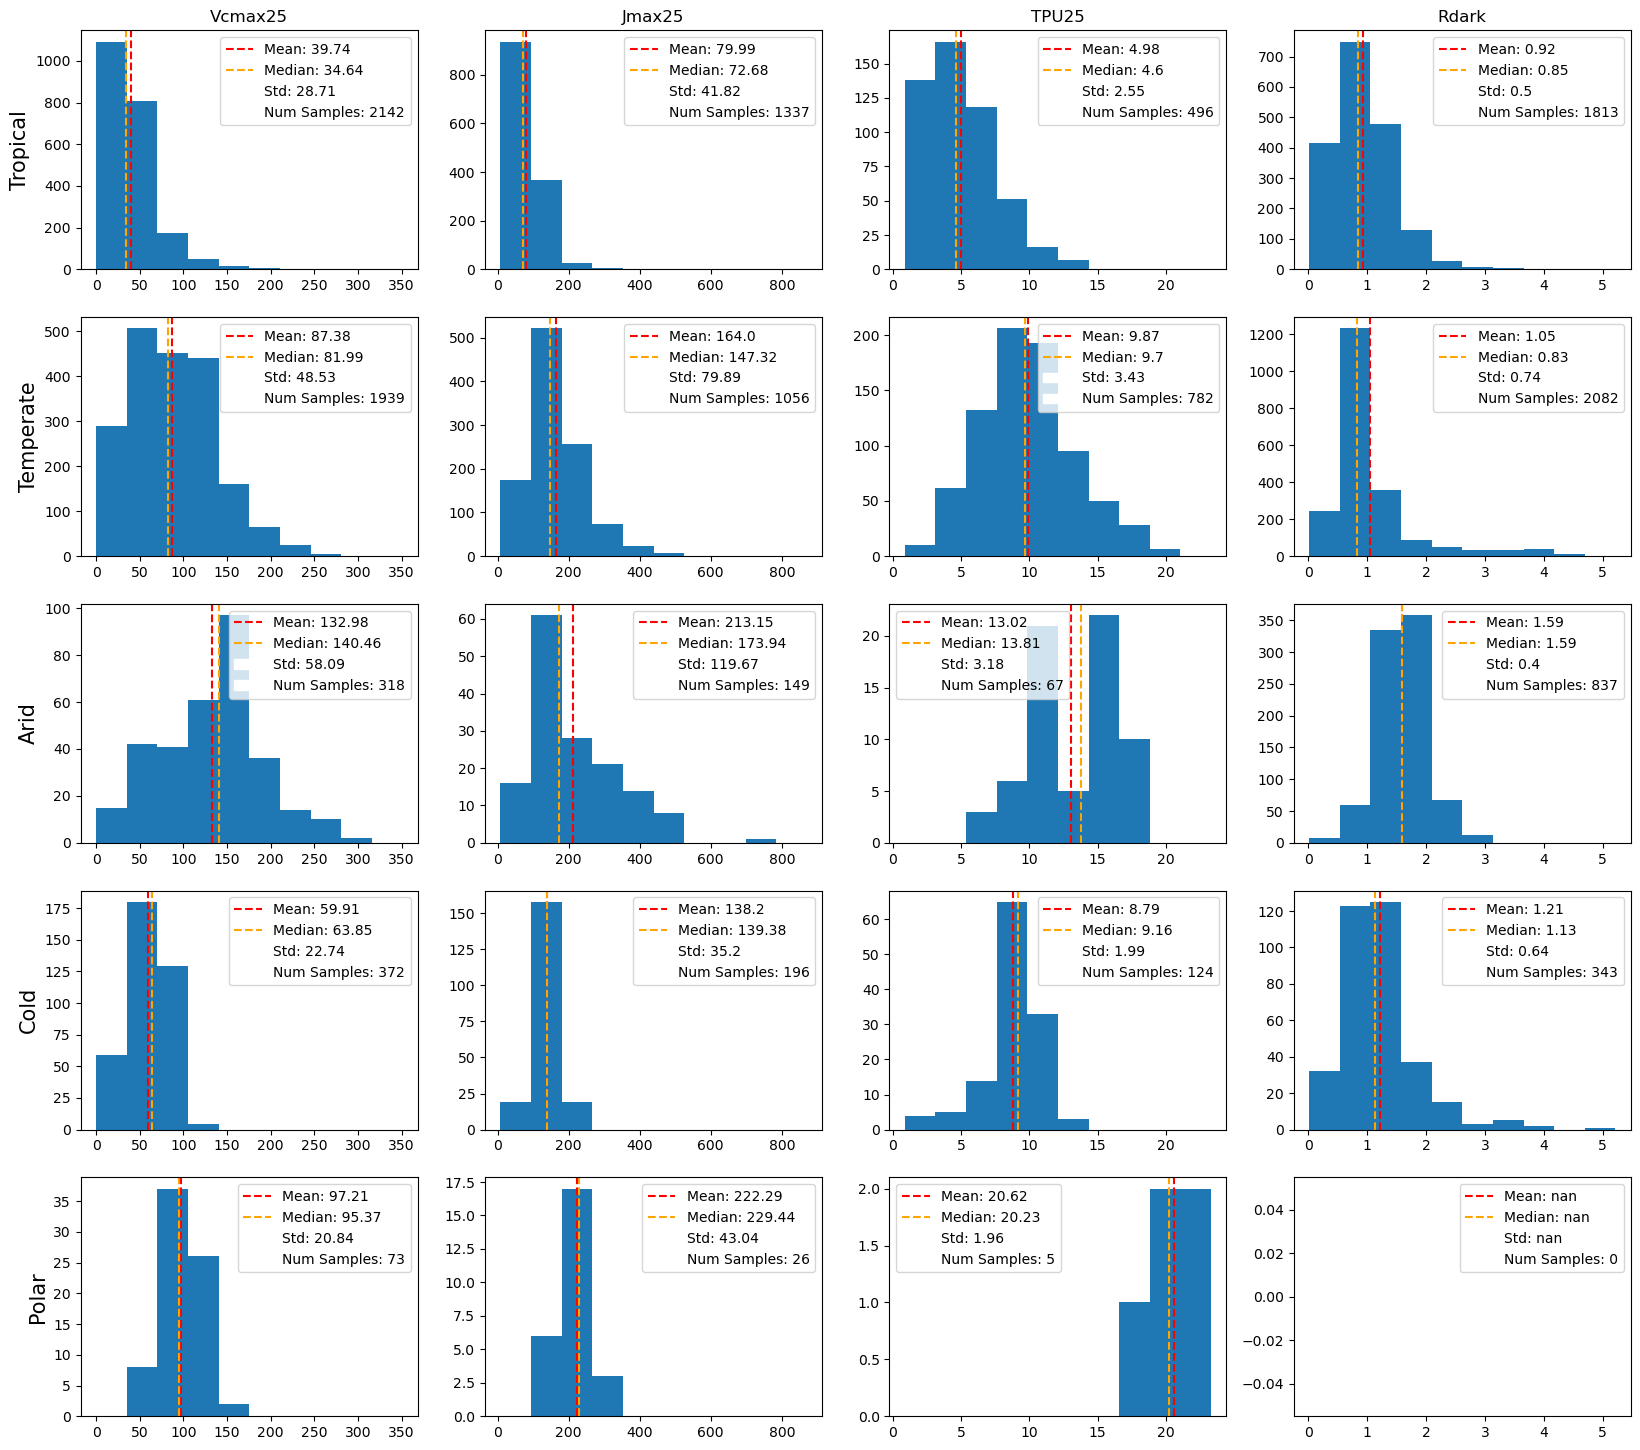

In [6]:
koppen_dict = {1:'Tropical',2:'Arid',3:'Temperate',4:'Cold',5:'Polar'}

figs,ax = plt.subplots(5,4, figsize=(20,18))

params = ['Vcmax25','Jmax25','TPU25','Rdark']
zones = database['koppen_zone_major'].unique()

for i in range(len(zones)):
    temp = database[database['koppen_zone_major'] == zones[i]]
    for j in range(len(params)):
        temp1 = temp.dropna(subset=[params[j]])
        ax[i,j].hist(temp1[params[j]], range=(np.nanmin(database[params[j]]), np.nanmax(database[params[j]])))
        
        mean = np.round(np.mean(temp1[params[j]]), decimals=2)
        median = np.round(np.median(temp1[params[j]]), decimals=2)
        std_dev = np.round(np.std(temp1[params[j]]), decimals=2)
        num_samples = len(temp1[params[j]])
        
        ax[i,j].axvline(mean, color='red', linestyle='dashed',label=f"Mean: {mean}")
        ax[i,j].axvline(median, color='orange', linestyle='dashed',label=f"Median: {median}")
        
        red_patch = mpatches.Patch(color='white', label= f"Std: {std_dev}")
        red_patch1 = mpatches.Patch(color='white', label= f"Num Samples: {num_samples}")
        
        handles, labels = ax[i,j].get_legend_handles_labels()
        handles.extend([red_patch,red_patch1])
        
        ax[i,j].legend(handles=handles)
        
        if i == 0:
            ax[i,j].set_title(params[j])
        if j == 0:
            ax[i,j].set_ylabel(koppen_dict[zones[i]],fontsize=15)          
        
plt.show()

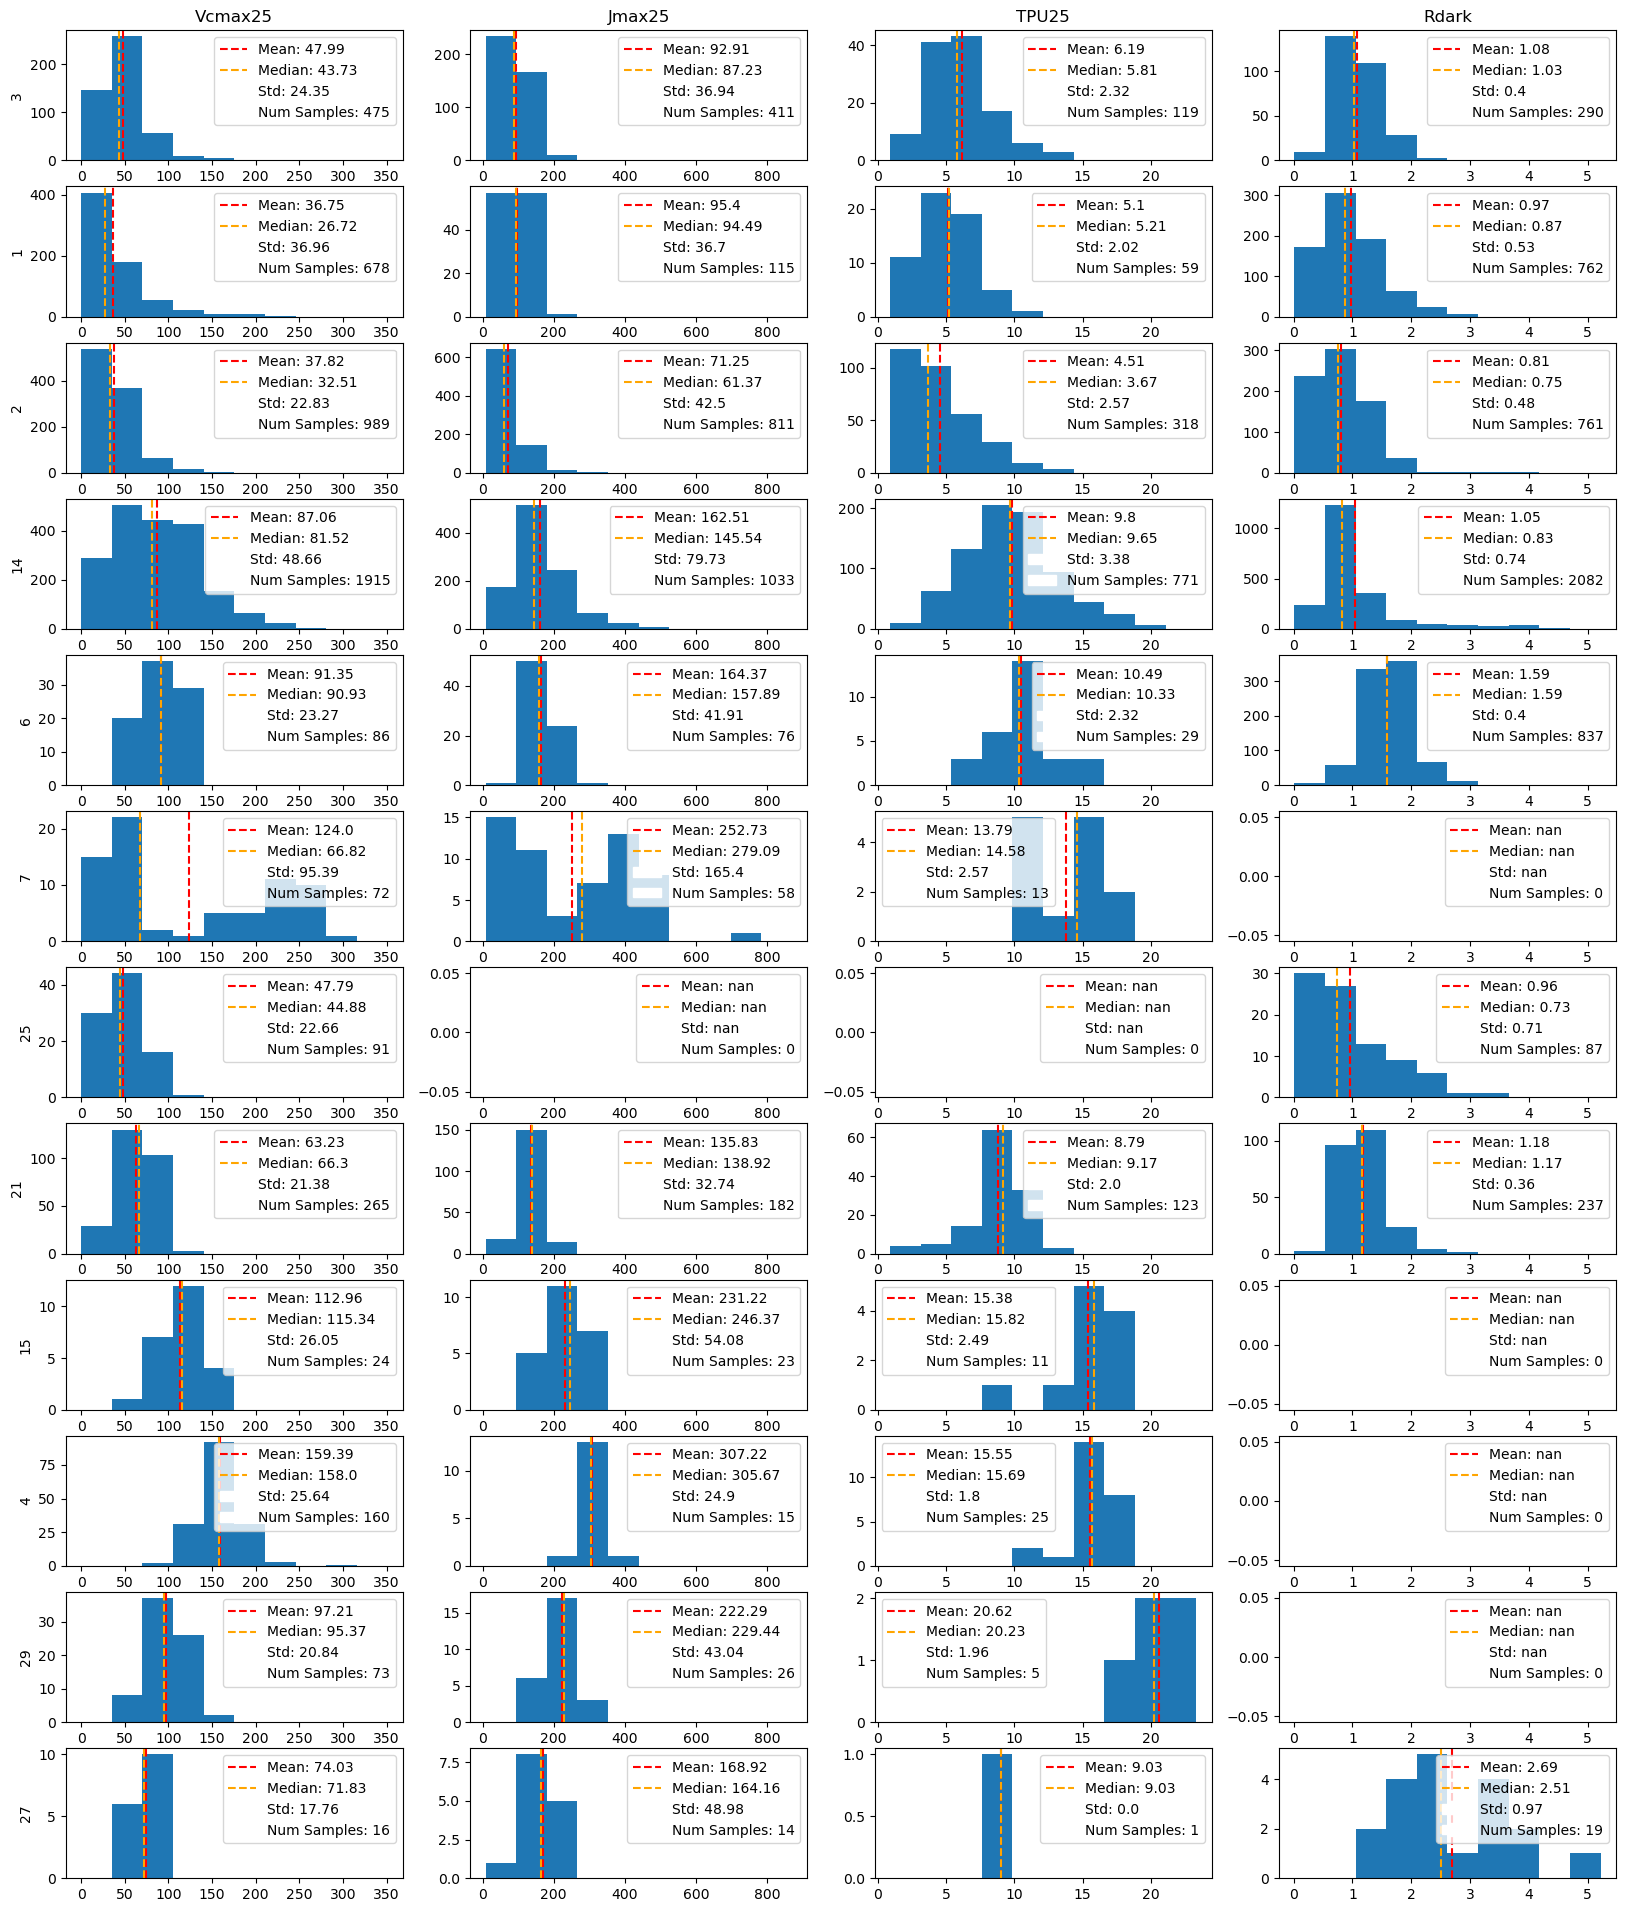

In [7]:
figs,ax = plt.subplots(12,4, figsize=(20,24))

params = ['Vcmax25','Jmax25','TPU25','Rdark']
zones = database['koppen_zone_minor'].unique()

for i in range(len(zones)):
    temp = database[database['koppen_zone_minor'] == zones[i]]
    for j in range(len(params)):
        temp1 = temp.dropna(subset=[params[j]])
        ax[i,j].hist(temp1[params[j]], range=(np.nanmin(database[params[j]]), np.nanmax(database[params[j]]))) 

        mean = np.round(np.mean(temp1[params[j]]), decimals=2)
        median = np.round(np.median(temp1[params[j]]), decimals=2)
        std_dev = np.round(np.std(temp1[params[j]]), decimals=2)
        num_samples = len(temp1[params[j]])
        
        ax[i,j].axvline(mean, color='red', linestyle='dashed',label=f"Mean: {mean}")
        ax[i,j].axvline(median, color='orange', linestyle='dashed',label=f"Median: {median}")
        
        red_patch = mpatches.Patch(color='white', label= f"Std: {std_dev}")
        red_patch1 = mpatches.Patch(color='white', label= f"Num Samples: {num_samples}")
        
        handles, labels = ax[i,j].get_legend_handles_labels()
        handles.extend([red_patch,red_patch1])
        
        ax[i,j].legend(handles=handles)
        
        if i == 0:
            ax[i,j].set_title(params[j])
        if j == 0:
            ax[i,j].set_ylabel(zones[i],fontsize=10)         
        
plt.show()

In [8]:
year = []
for i in range(len(database)):
    
    if database['Dataset_name'][i][-4:] == '21_2':
        year.append("2021")
    else:
        year.append(database['Dataset_name'][i][-4:])
database['year'] = year
database['year'].unique()

array(['2018', '2021', '2024', '2022', '2019', '2017', '2023', '2025',
       '2020'], dtype=object)

In [9]:
pft_data = pd.read_csv("/Users/rishi/Documents/ORNL Internships/25/PFT-Data-MCD12Q1-061-results.csv")
pft_data['year'] = pft_data['Date'].str[0:4]

In [10]:
max_pft = []
lat = []

for i in pft_data['Latitude'].unique():
    lat.append(i)
    
    temp = pft_data[pft_data['Latitude'] == i].reset_index()
    
    
    num_each = [0] * 16
    
    
    for j in range(len(temp)):
        num_each[int(temp['MCD12Q1_061_LC_Type5'][j])] += 1
        
    max_pft.append((np.argmax(num_each)))
    
    
lat_max_pft = pd.DataFrame({'max_pft':max_pft,'Latitude':lat})


In [11]:
database = database.merge(lat_max_pft,how='left',on='Latitude')

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


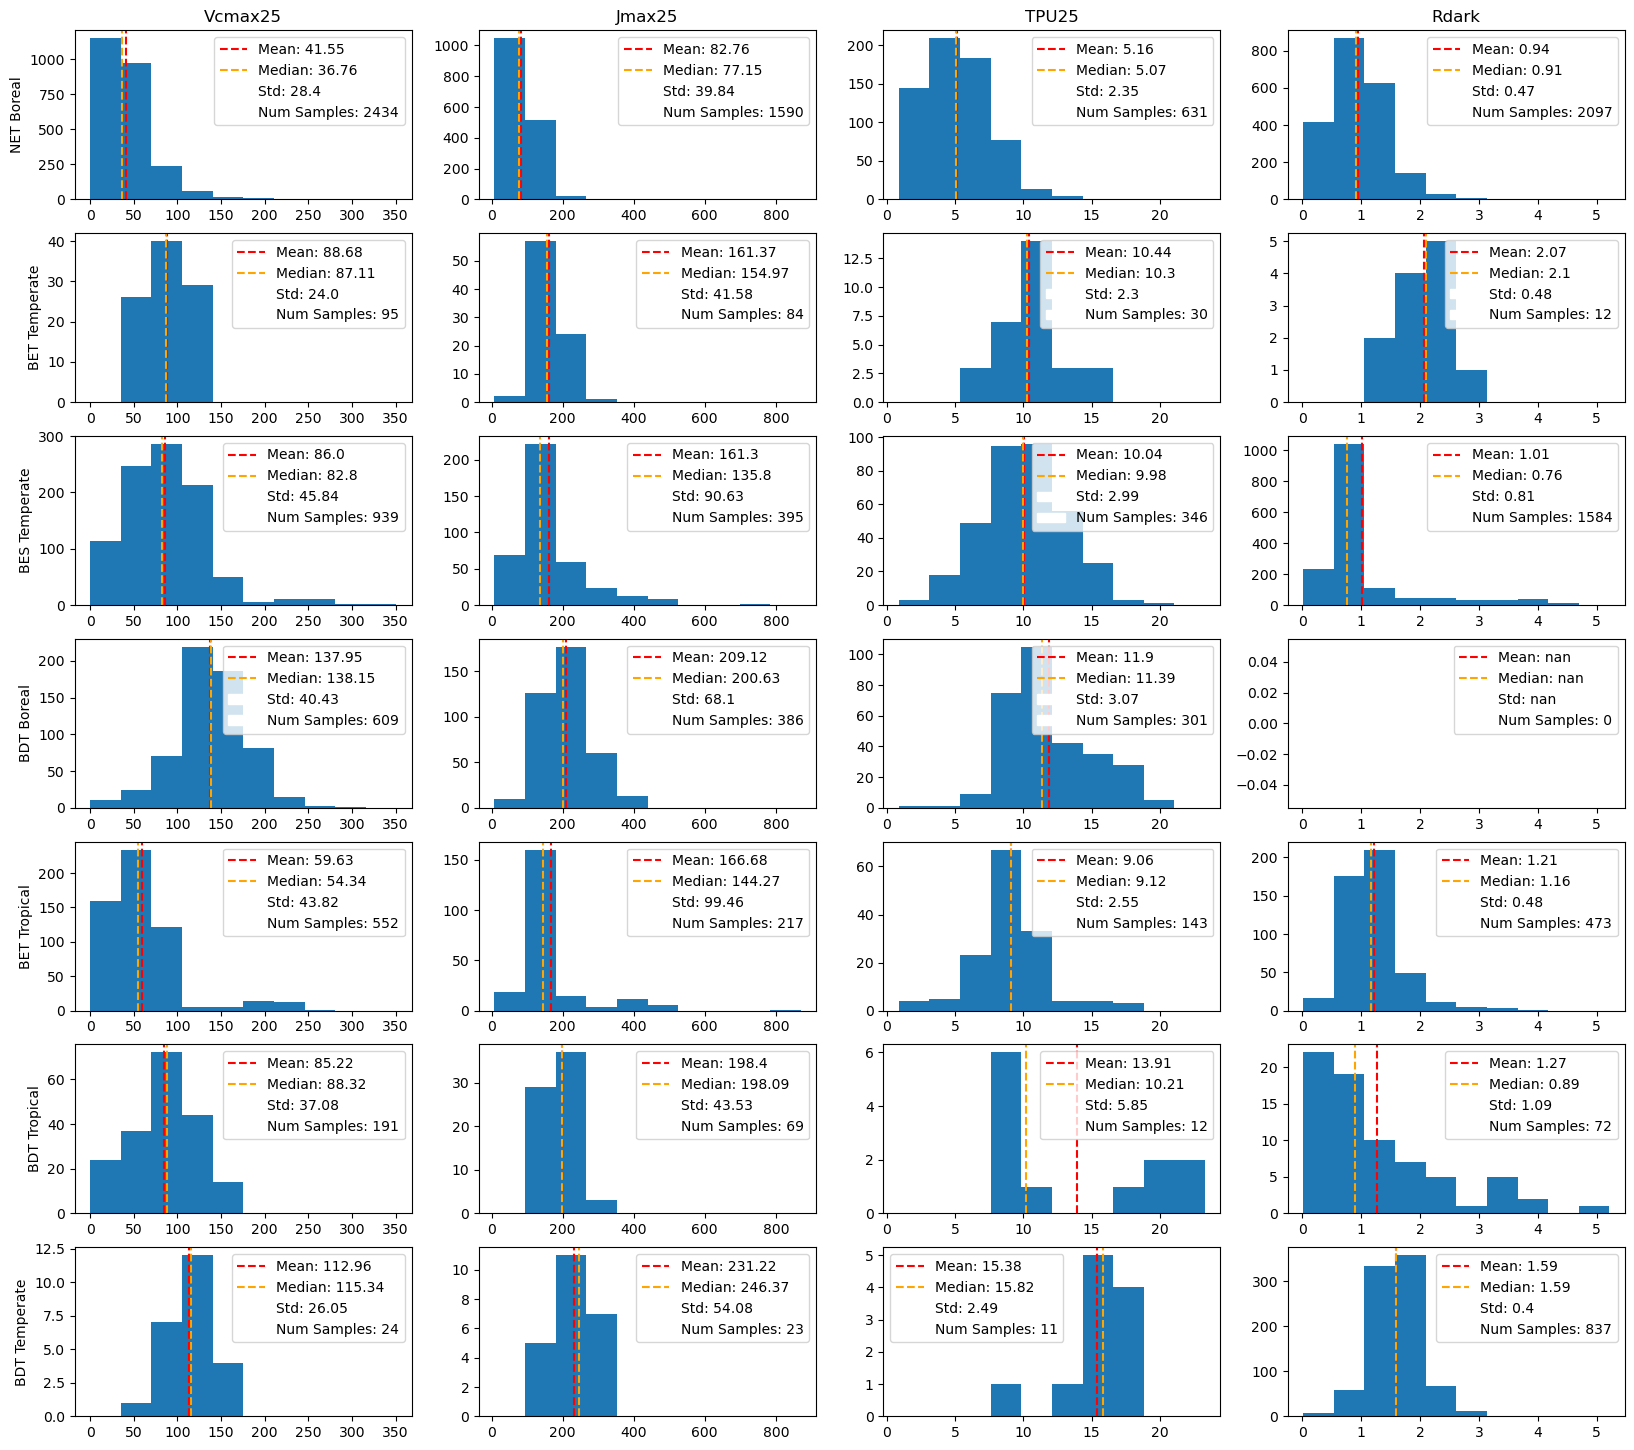

In [21]:
pft_dict = {2:'NET Boreal',3:'NDT Boreal',4:'BET Tropical',5:'BET Temperate',6:'BDT Tropical',7:'BDT Temperate',8:'BDT Boreal',9:'BES Temperate'}

figs,ax = plt.subplots(7,4, figsize=(20,18))

params = ['Vcmax25','Jmax25','TPU25','Rdark']
pfts = database['max_pft'].unique()

for i in range(len(pfts)):
    temp = database[database['max_pft'] == pfts[i]]
    
    for j in range(len(params)):
        temp1 = temp.dropna(subset=[params[j]])        
        ax[i,j].hist(temp1[params[j]], range=(np.nanmin(database[params[j]]), np.nanmax(database[params[j]])))
        
        mean = np.round(np.mean(temp1[params[j]]), decimals=2)
        median = np.round(np.median(temp1[params[j]]), decimals=2)
        std_dev = np.round(np.std(temp1[params[j]]), decimals=2)
        num_samples = len(temp1[params[j]])
        
        ax[i,j].axvline(mean, color='red', linestyle='dashed',label=f"Mean: {mean}")
        ax[i,j].axvline(median, color='orange', linestyle='dashed',label=f"Median: {median}")
        
        red_patch = mpatches.Patch(color='white', label= f"Std: {std_dev}")
        red_patch1 = mpatches.Patch(color='white', label= f"Num Samples: {num_samples}")
        
        handles, labels = ax[i,j].get_legend_handles_labels()
        handles.extend([red_patch,red_patch1])
        
        ax[i,j].legend(handles=handles)

        if i == 0:
            ax[i,j].set_title(params[j])
        if j == 0:
            ax[i,j].set_ylabel(pft_dict[pfts[i]],fontsize=10)
        
plt.show()

In [14]:
# Species Analysis

Text(0.5, 0, 'Num Species')

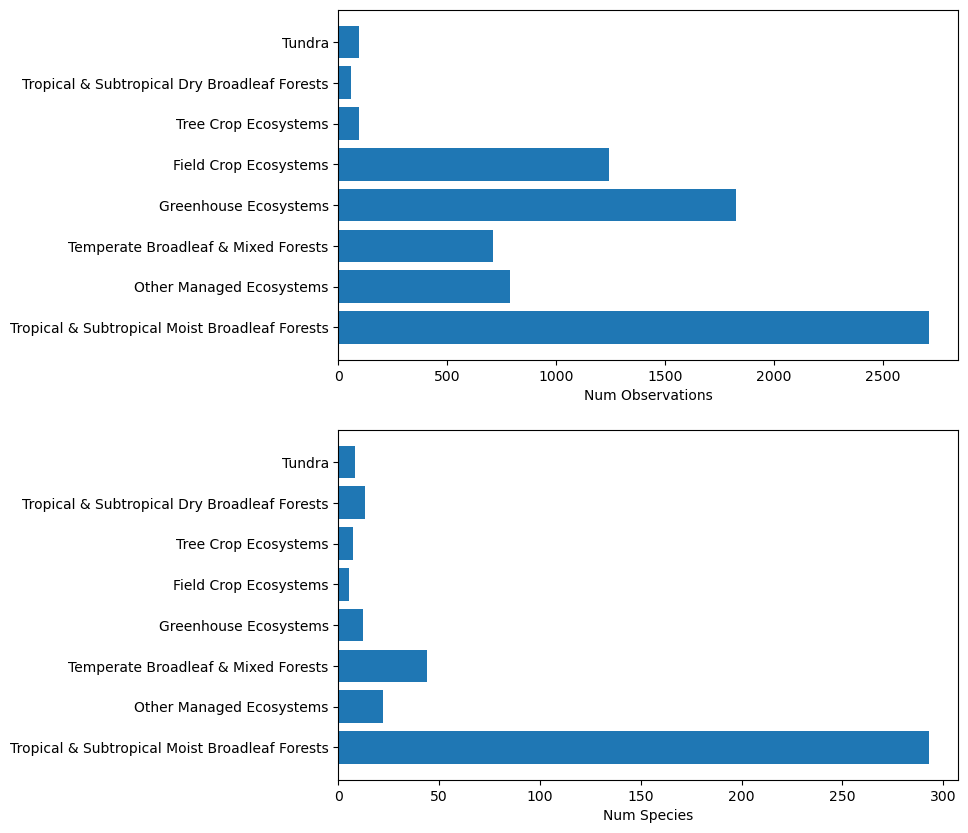

In [16]:
figs,ax = plt.subplots(2,1,figsize=(8,10))



num_species = []
num_observations = []
biome_name = []

for i in database['Biome_number'].unique():
    temp = database[database['Biome_number'] == i].reset_index()
    
    biome_name.append(temp['Biome'][0])
    num_observations.append(len(temp))
    num_species.append(len(temp['Species'].unique()))
    
ax[0].barh(biome_name,num_observations)
ax[0].set_xlabel("Num Observations")


ax[1].barh(biome_name,num_species)
ax[1].set_xlabel("Num Species")

Text(0.5, 0, 'Num Species')

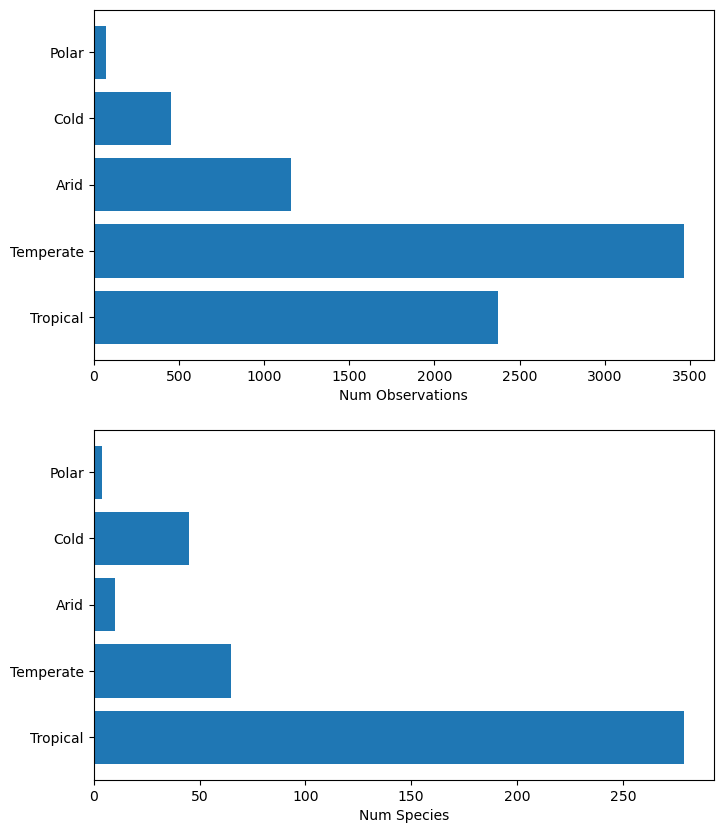

In [20]:
koppen_dict = {1:'Tropical',2:'Arid',3:'Temperate',4:'Cold',5:'Polar'}
figs,ax = plt.subplots(2,1,figsize=(8,10))



num_species = []
num_observations = []
koppen_zone_major_name = []

for i in database['koppen_zone_major'].unique():
    temp = database[database['koppen_zone_major'] == i].reset_index()
    
    koppen_zone_major_name.append(koppen_dict[temp['koppen_zone_major'][0]])
    num_observations.append(len(temp))
    num_species.append(len(temp['Species'].unique()))
    
ax[0].barh(koppen_zone_major_name,num_observations)
ax[0].set_xlabel("Num Observations")

ax[1].barh(koppen_zone_major_name,num_species)
ax[1].set_xlabel("Num Species")

<BarContainer object of 12 artists>

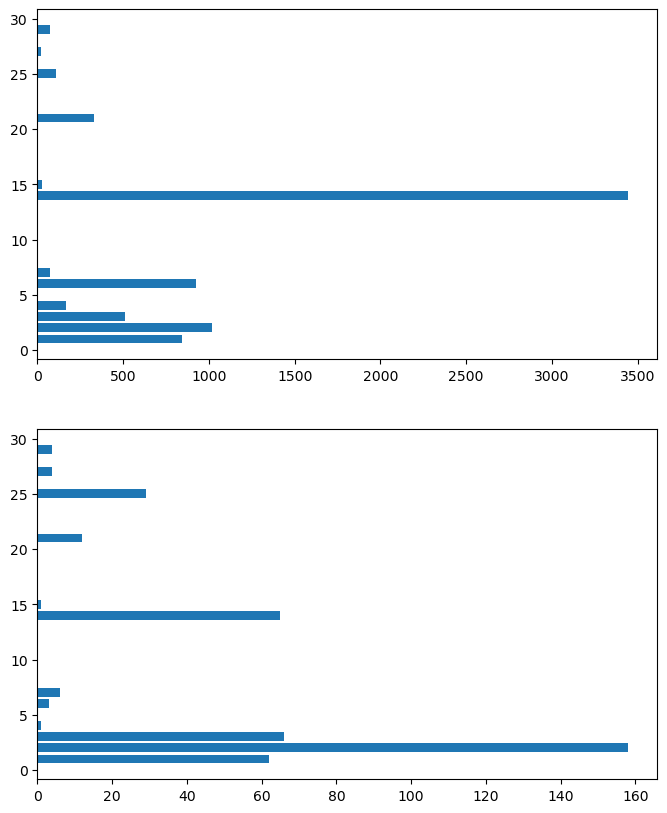

In [266]:
figs,ax = plt.subplots(2,1,figsize=(8,10))

num_species = []
num_observations = []
koppen_zone_minor_name = []

for i in database['koppen_zone_minor'].unique():
    temp = database[database['koppen_zone_minor'] == i].reset_index()
    
    koppen_zone_minor_name.append(temp['koppen_zone_minor'][0])
    num_observations.append(len(temp))
    num_species.append(len(temp['Species'].unique()))
    
ax[0].barh(koppen_zone_minor_name,num_observations)

ax[1].barh(koppen_zone_minor_name,num_species)

Text(0.5, 0, 'Num Species')

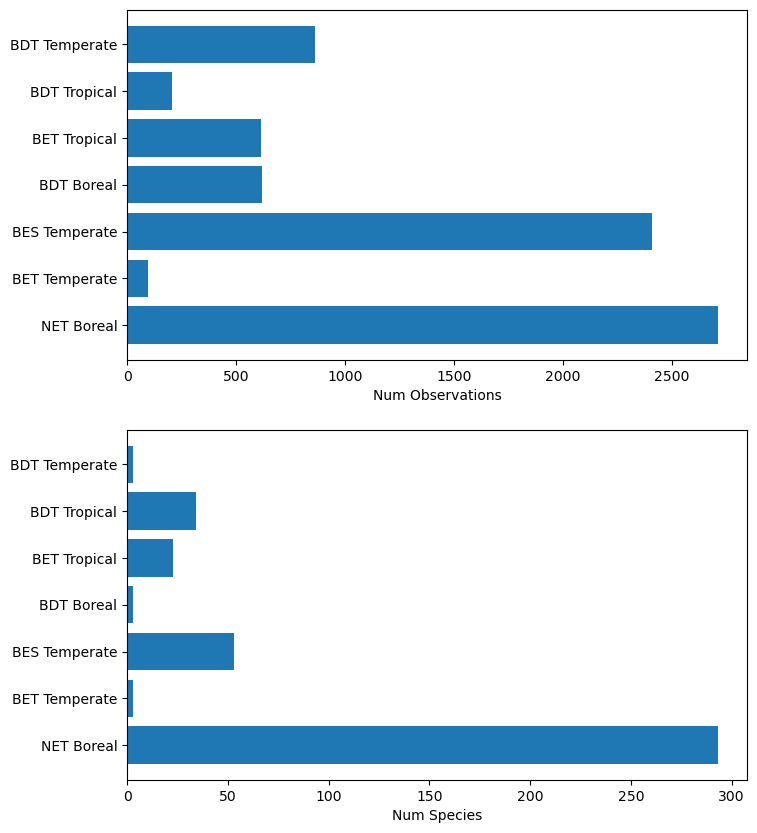

In [22]:
pft_dict = {2:'NET Boreal',3:'NDT Boreal',4:'BET Tropical',5:'BET Temperate',6:'BDT Tropical',7:'BDT Temperate',8:'BDT Boreal',9:'BES Temperate'}
figs,ax = plt.subplots(2,1,figsize=(8,10))

num_species = []
num_observations = []
pft_name = []

for i in database['max_pft'].unique():
    temp = database[database['max_pft'] == i].reset_index()
    
    pft_name.append(pft_dict[temp['max_pft'][0]])
    num_observations.append(len(temp))
    num_species.append(len(temp['Species'].unique()))
    
ax[0].barh(pft_name,num_observations)
ax[0].set_xlabel("Num Observations")

ax[1].barh(pft_name,num_species)
ax[1].set_xlabel("Num Species")

In [268]:
temp1 = database[database['Sun_Shade'] == np.nan]
temp1

,Site_name,SampleID,Dataset_name,Species,Sun_Shade,Phenological_stage,Plant_type,Photosynthetic_pathway,Soil,LMA,...,Wave_ 2496,Wave_ 2497,Wave_ 2498,Wave_ 2499,Wave_ 2500,Biome,koppen_zone_major,koppen_zone_minor,year,max_pft
